## C16 - Statistical Analysis and Outlier Detection

### Online Class Interractions

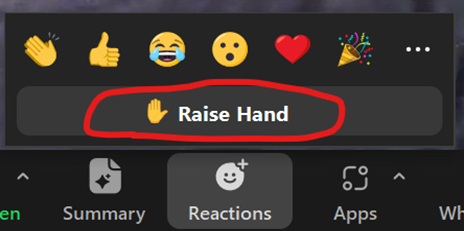

***Kindly note the following points for smooth Online Class Interractions:***
1. This Online Class content is ***recorded and shared among this course Learners*** for future reference of the content
2. Please click the **Raise Hand** option when you need to speak during live class
3. Share your **computer screen**, for discussing technical content questions, only when asked by the Tutor
4. ***For quick interractions during live class***     - please type in the **Chat section** with simple answers, thoughts, or suggestions
5. ***For technical content questions in the course*** - you can ask the Tutor
6. ***For any other questions about the course*** - you can ask the course Coordinator

### Feedback form

### Assignment-4 Reminder (Deadline: 02/02/2025)

### [10m] Previous class recap

### [15m] Assignment-3 Answers Explanation

### [10m] Data Preparation for Visualization and Analysis

In [1]:
import pandas as pd
df = pd.read_csv("Sleep_Efficiency.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

#### Correcting the column names according to the standard

In [3]:
new_column_name_list = []

for name in df.columns:
    temp_name = name.lower()
    temp_name = temp_name.replace(" ", "_")
    new_column_name_list.append(temp_name)

print(new_column_name_list)

['id', 'age', 'gender', 'bedtime', 'wakeup_time', 'sleep_duration', 'sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings', 'caffeine_consumption', 'alcohol_consumption', 'smoking_status', 'exercise_frequency']


In [4]:
df.columns = new_column_name_list
df.columns

Index(['id', 'age', 'gender', 'bedtime', 'wakeup_time', 'sleep_duration',
       'sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage',
       'light_sleep_percentage', 'awakenings', 'caffeine_consumption',
       'alcohol_consumption', 'smoking_status', 'exercise_frequency'],
      dtype='object')

#### Data type check and fix

In [5]:
df["bedtime"] = pd.to_datetime(df["bedtime"], format="mixed")
df["wakeup_time"] = pd.to_datetime(df["wakeup_time"], format="mixed")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      452 non-null    int64         
 1   age                     452 non-null    int64         
 2   gender                  452 non-null    object        
 3   bedtime                 452 non-null    datetime64[ns]
 4   wakeup_time             452 non-null    datetime64[ns]
 5   sleep_duration          452 non-null    float64       
 6   sleep_efficiency        452 non-null    float64       
 7   rem_sleep_percentage    452 non-null    int64         
 8   deep_sleep_percentage   452 non-null    int64         
 9   light_sleep_percentage  452 non-null    int64         
 10  awakenings              432 non-null    float64       
 11  caffeine_consumption    427 non-null    float64       
 12  alcohol_consumption     438 non-null    float64   

In [8]:
df["caffeine_consumption"].value_counts()  # Discrete data

caffeine_consumption
0.0      211
50.0     107
25.0      79
75.0      25
200.0      4
100.0      1
Name: count, dtype: int64

In [9]:
df["age"].value_counts()  # Continuous data / Discrete data

age
27    19
52    19
37    18
40    17
29    17
      ..
10     1
13     1
67     1
17     1
12     1
Name: count, Length: 61, dtype: int64

In [11]:
df["smoking_status"].value_counts()  # Nominal data

smoking_status
No     298
Yes    154
Name: count, dtype: int64

### [20m] 4 Types of Data in Statistics
- Qualitative (Categorical) - Nominal, Ordinal
- Quantitative (Numerical) - Discrete, Continuous
- Reference: https://www.mygreatlearning.com/blog/types-of-data/

**Nominal Data (examples):**

- Colour of hair (Blonde, Red, Brown, Black, etc.)
- Marital status (Single, Married)
- Nationality (Indian, German, American)
- Gender (Male, Female, Others)
- Eye Color (Black, Brown, etc.)

**Ordinal Data (examples):**
- When companies ask for feedback, experience, or satisfaction on a scale of 1 to 10
- Letter grades in the exam (A, B, C, D, etc.)
- Ranking of people in a competition (First, Second, Third, etc.)
- Economic Status (High, Medium, and Low)
- Education Level (Higher, Secondary, Primary)

**Discrete Data (examples):**
- Total numbers of students present in a class - **50 students**
- Numbers of employees in a company - **1500 employees**
- The total number of players who participated in a competition - **100 players**
- Days in a week - **7 days in a week**

**Continuous Data (examples):**
- Height of a person - **175.6 cm**
- Speed of a vehicle - **62.45 km/hr**
- “Time-taken” to finish the work - **2hrs 10mins 3seconds (02:10:03)**
- Wi-Fi Frequency - **101.34 MHz**
- Market share price - **Rs.1358.94**
- Cost of a cell phone - **Rs.50,000.30**

### [15m] Statistics Basics - Understanding Distribution of Data
- Deal with lot of numerical data
- Used to deal with Continuous data
- Eg: Box plot
    - minimum value
    - maximum value
    - median (50% position value)
    - 1st quartile (25% position value) and 3rd quartile (75% position value)

In [60]:
import statistics

print("median", statistics.median([1,2,3,4,5,6,7,8,9,10,11,12,13]))
print("median", statistics.median([1,2,3,4,5,6,7,8,9,10,11,12]))
print("mean", statistics.mean([1,2,3,4,5,6,7,8,9,10,11,12]))

median 7
median 6.5
mean 6.5


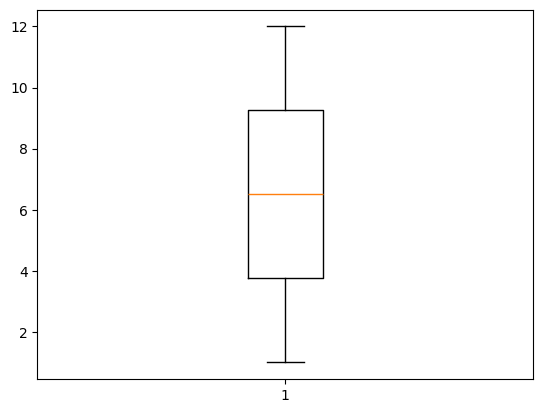

[3.25, 6.5, 9.75]


In [62]:
# Boxplot

import matplotlib.pyplot as plt

plt.boxplot([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

print(statistics.quantiles([1,2,3,4,5,6,7,8,9,10,11,12]))  # 1st, 2nd, and 3rd quartiles are [3.25, 6.5, 9.75]
"""
First quartile - Also known as the lower quartile, it is the 25th percentile. This means that 25% of the data is below this value.
Second quartile - Also known as the median, it is the 50th percentile. This means that 50% of the data is below this value.
Third quartile - Also known as the upper quartile, it is the 75th percentile. This means that 75% of the data is below this value.
"""

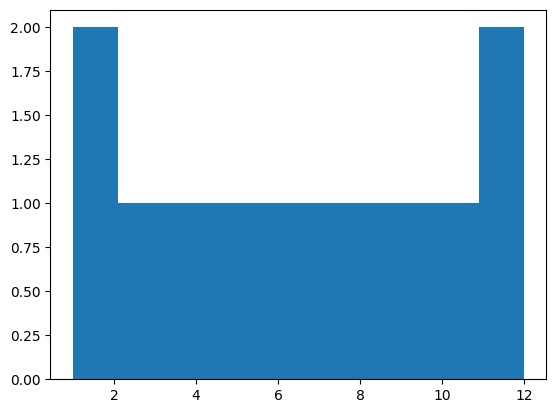

In [ ]:
# Histogram

import matplotlib.pyplot as plt

plt.hist([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

In [16]:
# Own dataset statistical parameters

import statistics
print("median", statistics.median(df["age"]))
print("mean", statistics.mean(df["age"]))
print("mode", statistics.mode(df["age"]))
print("min", min(df["age"]))
print("max", max(df["age"]))

median 40.0
mean 40.2853982300885
mode 27
min 9
max 69


In [17]:
# Mode means highest repeating value in the given series of numbers
# So we can use value_counts() function to verify that the above Mode value is correct or not

df["age"].value_counts().head(5)

age
27    19
52    19
37    18
40    17
29    17
Name: count, dtype: int64

### [5m] Example: Plot histogram - "Age"

<Axes: xlabel='age', ylabel='Count'>

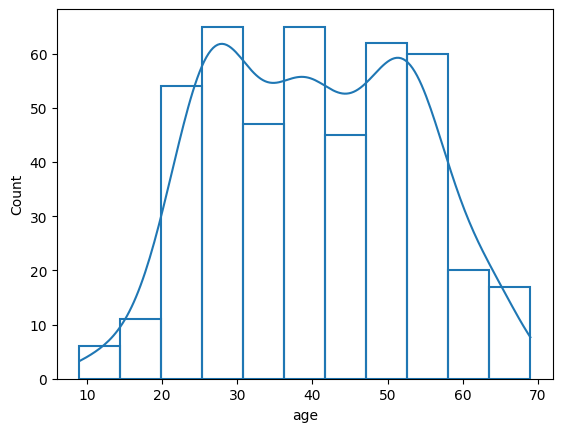

In [18]:
import seaborn as sns
sns.histplot(df["age"], kde=True, fill=False)  # kde - kernel density estimate

<Axes: xlabel='deep_sleep_percentage', ylabel='Count'>

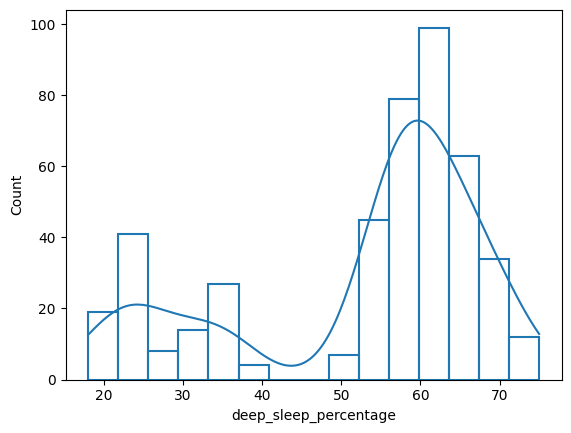

In [56]:
sns.histplot(df["deep_sleep_percentage"], kde=True, fill=False)

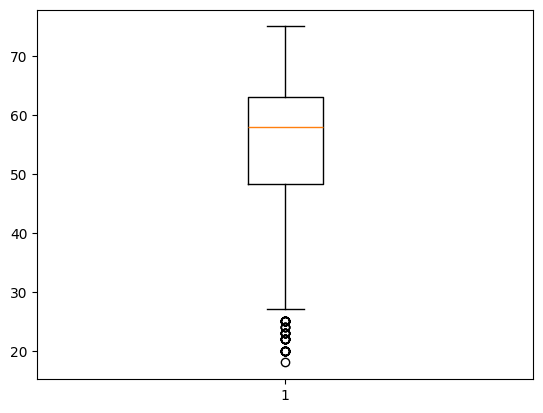

In [58]:
plt.boxplot(df["deep_sleep_percentage"])
plt.show()

### [30m] Statistics - Normal Distribution (Explained with Central Limit Theorem)

- **Normal Distribution** means **Bell-shaped curve**,
    - when plotting the **frequency distribution plot (Histogram)** of a series of values

<br>

**Central Limit Theorem (Steps):**
1. Take **Random values** and find its **mean**
2. **Repeat** the above process for many times (Eg: 3000 times)
3. **3000 mean values**
4. **Plot that 3000 mean values** in a graph (Use Histogram plot to know its frequency distribution)
5. That distribution will be **Normal Distribution**
    - In **perfect Normal Distribution**, the **mean**, **median**, and **mode** of the Series will be **very close** to each other

In [20]:
import numpy as np

mean_list = []

for i in range(3000):
    mean_list.append(np.random.randint(1, 1000, 200).mean())

print(len(mean_list))
print(mean_list)

3000
[np.float64(525.305), np.float64(516.675), np.float64(498.735), np.float64(538.095), np.float64(493.115), np.float64(485.61), np.float64(497.015), np.float64(472.865), np.float64(493.31), np.float64(516.15), np.float64(509.885), np.float64(523.395), np.float64(514.12), np.float64(464.44), np.float64(473.885), np.float64(535.005), np.float64(518.115), np.float64(527.34), np.float64(460.81), np.float64(494.98), np.float64(540.955), np.float64(519.385), np.float64(521.58), np.float64(441.48), np.float64(510.305), np.float64(552.36), np.float64(533.84), np.float64(494.78), np.float64(494.925), np.float64(484.78), np.float64(529.15), np.float64(512.935), np.float64(508.615), np.float64(489.335), np.float64(489.285), np.float64(521.585), np.float64(495.13), np.float64(495.78), np.float64(508.285), np.float64(521.54), np.float64(496.24), np.float64(500.59), np.float64(497.745), np.float64(527.51), np.float64(483.525), np.float64(482.53), np.float64(503.965), np.float64(530.425), np.float

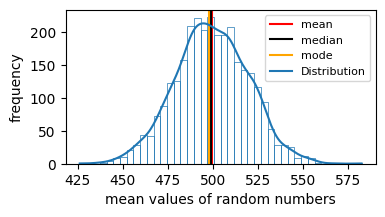

In [31]:
import pandas as pd
my_normal_series = pd.Series(mean_list)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,2))
plt.axvline(my_normal_series.mean(), color="red")
plt.axvline(my_normal_series.median(), color="black")
#plt.axvline(list(my_normal_series.mode())[0], color="orange")
plt.axvline(497.965, color="orange")
plt.xlabel("mean values of random numbers")
plt.ylabel("frequency")

# # Plotting using Matplotlib
# # plt.hist(my_normal_series)

# # Plotting using Seaborn
# #sns.displot(my_normal_series, kde=True)
sns.histplot(my_normal_series, kde=True, fill=False)

plt.legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="8")
plt.show()

In [23]:
print("my_normal_series Mean:", my_normal_series.mean())  # red color
print("my_normal_series Median:", my_normal_series.median())  # black color
print("my_normal_series Mode:", list(my_normal_series.mode()))  # orange color

my_normal_series Mean: 499.42470999999995
my_normal_series Median: 498.98
my_normal_series Mode: [468.705, 481.31, 487.7, 488.365, 488.47, 489.74, 490.1, 491.52, 492.89, 492.98, 493.93, 494.835, 495.07, 495.495, 495.81, 496.88, 497.965, 500.13, 500.795, 503.18, 504.04, 505.08, 509.1, 509.185, 509.755, 510.02, 512.48, 513.275, 514.51]


In [26]:
my_normal_series.value_counts()[468.705]

np.int64(3)

In [25]:
my_normal_series.value_counts()

500.795    3
510.020    3
509.185    3
503.180    3
495.810    3
          ..
495.780    1
508.285    1
521.540    1
496.240    1
525.465    1
Name: count, Length: 2698, dtype: int64

### [10m] Statistics - Skew and Kurtosis

In [32]:
# Skew has 3 types: +ve (long tail on right), Zero skew, -ve (long tail on left)
# Kurtosis has 3 types: +ve (upwards sharp peak), Normal, -ve (downwards flat peak)

print("my_normal_series Skew:", my_normal_series.skew())
print("my_normal_series Kurtosis:", my_normal_series.kurtosis())

my_normal_series Skew: 0.002562526834079353
my_normal_series Kurtosis: -0.021141675316695085


Reference: https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/sk1.webp

**Skew**

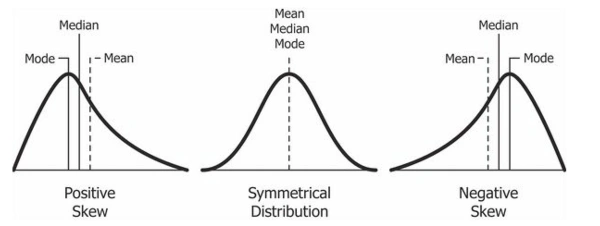

Reference: https://cdn.analyticsvidhya.com/wp-content/uploads/2023/07/image-1.png

**Kurtosis**

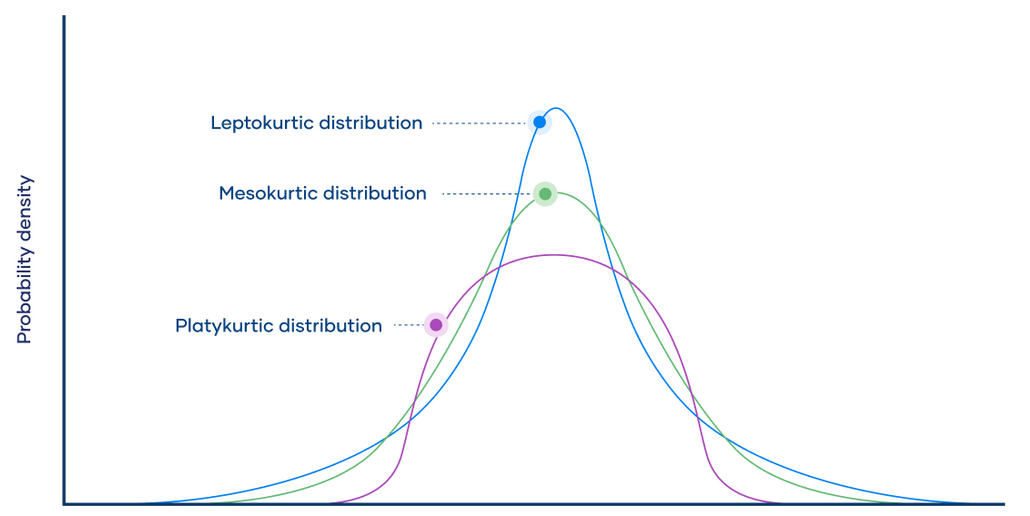

### [20m] Statistics - non-Normal Distribution
- The amount of **Skew** will be high in this Distribution
- Also the amount of **Kurtosis** will be high and not Normal

In [34]:
# Taking minimal numbers for plotting (i.e) loop for only 50 times
# This will give a non-Normal distribution with high Skew and Kurtosis values

import numpy as np

mean_list = []

for i in range(50):
    mean_list.append(np.random.randint(1, 1000, 200).mean())

print(len(mean_list))
print(mean_list)

50
[np.float64(469.09), np.float64(464.585), np.float64(528.45), np.float64(480.05), np.float64(503.815), np.float64(482.775), np.float64(532.27), np.float64(500.755), np.float64(483.32), np.float64(492.02), np.float64(507.81), np.float64(493.565), np.float64(523.815), np.float64(506.92), np.float64(485.05), np.float64(527.915), np.float64(495.65), np.float64(501.9), np.float64(488.55), np.float64(475.67), np.float64(519.825), np.float64(519.1), np.float64(489.365), np.float64(487.17), np.float64(508.445), np.float64(472.515), np.float64(478.96), np.float64(501.82), np.float64(511.03), np.float64(508.49), np.float64(517.915), np.float64(502.495), np.float64(483.525), np.float64(547.96), np.float64(501.26), np.float64(492.48), np.float64(498.91), np.float64(521.115), np.float64(482.015), np.float64(477.375), np.float64(487.3), np.float64(530.825), np.float64(472.545), np.float64(475.74), np.float64(500.64), np.float64(526.215), np.float64(498.615), np.float64(525.915), np.float64(549.26

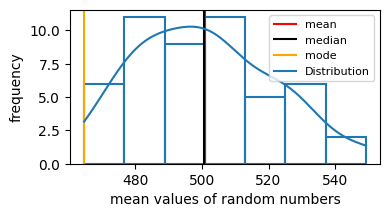

In [35]:
import pandas as pd
my_NON_NORMAL_series = pd.Series(mean_list)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,2))
plt.axvline(my_NON_NORMAL_series.mean(), color="red")
plt.axvline(my_NON_NORMAL_series.median(), color="black")
plt.axvline(list(my_NON_NORMAL_series.mode())[0], color="orange")
plt.xlabel("mean values of random numbers")
plt.ylabel("frequency")

# Plotting using Seaborn
sns.histplot(my_NON_NORMAL_series, kde=True, fill=False)

plt.legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="8")
plt.show()

In [36]:
print("my_NON_NORMAL_series Mean:", my_NON_NORMAL_series.mean())  # red color
print("my_NON_NORMAL_series Median:", my_NON_NORMAL_series.median())  # black color
print("my_NON_NORMAL_series Mode:", list(my_NON_NORMAL_series.mode()))  # orange color

my_NON_NORMAL_series Mean: 500.7888
my_NON_NORMAL_series Median: 500.6975
my_NON_NORMAL_series Mode: [464.585, 469.09, 472.515, 472.545, 475.67, 475.74, 477.375, 478.96, 480.05, 482.015, 482.775, 483.32, 483.525, 485.05, 487.17, 487.3, 488.55, 489.365, 492.02, 492.48, 493.565, 495.65, 498.615, 498.91, 500.64, 500.755, 501.26, 501.82, 501.9, 502.495, 503.815, 506.635, 506.92, 507.81, 508.445, 508.49, 511.03, 517.915, 519.1, 519.825, 521.115, 523.815, 525.915, 526.215, 527.915, 528.45, 530.825, 532.27, 547.96, 549.265]


In [37]:
# Skew has 3 types: +ve (long tail on right), Zero skew, -ve (long tail on left)
# Kurtosis has 3 types: +ve (upwards sharp peak), Normal, -ve (downwards flat peak)

print("my_NON_NORMAL_series Skew:", my_NON_NORMAL_series.skew())
print("my_NON_NORMAL_series Kurtosis:", my_NON_NORMAL_series.kurtosis())

my_NON_NORMAL_series Skew: 0.4125878329897127
my_NON_NORMAL_series Kurtosis: -0.42953210147607335


50
[np.float64(527.79), np.float64(487.155), np.float64(509.545), np.float64(496.405), np.float64(515.39), np.float64(551.455), np.float64(504.3), np.float64(510.925), np.float64(498.625), np.float64(514.835), np.float64(505.23), np.float64(501.63), np.float64(500.455), np.float64(514.725), np.float64(494.72), np.float64(488.14), np.float64(471.87), np.float64(532.995), np.float64(500.615), np.float64(479.4), np.float64(500.14), np.float64(493.575), np.float64(511.39), np.float64(525.225), np.float64(512.915), np.float64(509.945), np.float64(509.23), np.float64(507.34), np.float64(507.75), np.float64(513.37), np.float64(490.675), np.float64(463.35), np.float64(491.41), np.float64(473.615), np.float64(484.465), np.float64(505.41), np.float64(490.55), np.float64(499.69), np.float64(547.01), np.float64(463.81), np.float64(472.79), np.float64(497.155), np.float64(487.93), np.float64(467.47), np.float64(516.14), np.float64(499.635), np.float64(495.79), np.float64(475.54), np.float64(496.115

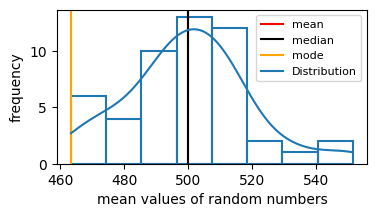

my_NON_NORMAL_series Skew: 0.33572626313441084
my_NON_NORMAL_series Kurtosis: 0.6180326819500341


In [54]:
# Taking minimal numbers for plotting (i.e) loop for only 50 times
# This will give a non-Normal distribution with high Skew and Kurtosis values

import numpy as np

mean_list = []

for i in range(50):
    mean_list.append(np.random.randint(1, 1000, 200).mean())

print(len(mean_list))
print(mean_list)

import pandas as pd
my_NON_NORMAL_series = pd.Series(mean_list)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,2))
plt.axvline(my_NON_NORMAL_series.mean(), color="red")
plt.axvline(my_NON_NORMAL_series.median(), color="black")
plt.axvline(list(my_NON_NORMAL_series.mode())[0], color="orange")
plt.xlabel("mean values of random numbers")
plt.ylabel("frequency")

# Plotting using Seaborn
sns.histplot(my_NON_NORMAL_series, kde=True, fill=False)

plt.legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="8")
plt.show()

# Skew has 3 types: +ve (long tail on right), Zero skew, -ve (long tail on left)
# Kurtosis has 3 types: +ve (upwards sharp peak), Normal, -ve (downwards flat peak)

print("my_NON_NORMAL_series Skew:", my_NON_NORMAL_series.skew())
print("my_NON_NORMAL_series Kurtosis:", my_NON_NORMAL_series.kurtosis())

#### **Example: -ve Skew and -ve Kurtosis**
- Negative Skew (long tail on left)
- Negative Kurtosis (downwards flat peak)

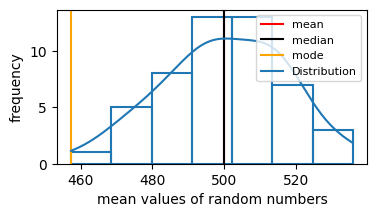
- **Skew:** -0.235805625203691
- **Kurtosis:** -0.30846809802244746

#### **Example: +ve Skew and +ve Kurtosis**
- Positive Skew (long tail on right)
- Positive Kurtosis (upwards sharp peak)

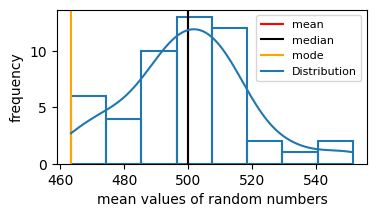

- **Skew:** 0.33572626313441084
- **Kurtosis:** 0.6180326819500341

### [5m] Skew and Kurtosis of "Age" feature in our dataset

In [55]:
print("Skew:", df["age"].skew())
print("Kurtosis:", df["age"].kurtosis())

Skew: 0.03990014652808803
Kurtosis: -0.9446147215143337


### Feedback form

### Assignment-4 Reminder (Deadline: 02/02/2025)

### [30m] Start Assignment-4 and doubt clearing